In [2]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
gnomad_cons = pd.read_csv("../dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

In [3]:
# Load Permut Dat
ASD_Region_Permut = []
ASD_Region_Local_Permut = []
ASD_Region_Distal_Permut = []
Sib_Region_Permut = []
Sib_Region_Local_Permut = []
Sib_Region_Distal_Permut = []

In [4]:
Region_DIR = "dat/TopN_Cohe_EdgePermutation/RegionPreserve/"
for file in os.listdir(Region_DIR):
    if file.startswith("ASD_Region_Permut"):
        array = np.load(Region_DIR+file)
        ASD_Region_Permut.append(array)
    elif file.startswith("ASD_Region_Local_Permut"):
        array = np.load(Region_DIR+file)
        ASD_Region_Local_Permut.append(array)
    elif file.startswith("ASD_Region_Distal_Permut"):
        array = np.load(Region_DIR+file)
        ASD_Region_Distal_Permut.append(array)
    elif file.startswith("Sib_Region_Permut"):
        array = np.load(Region_DIR+file)
        Sib_Region_Permut.append(array)
    elif file.startswith("Sib_Region_Local_Permut"):
        array = np.load(Region_DIR+file)
        Sib_Region_Local_Permut.append(array)
    elif file.startswith("Sib_Region_Distal_Permut"):
        array = np.load(Region_DIR+file)
        Sib_Region_Distal_Permut.append(array)

In [5]:
ASD_Region_Permut = np.concatenate(ASD_Region_Permut, axis=0)
ASD_Region_Local_Permut = np.concatenate(ASD_Region_Local_Permut, axis=0)
ASD_Region_Distal_Permut = np.concatenate(ASD_Region_Distal_Permut, axis=0)
Sib_Region_Permut = np.concatenate(Sib_Region_Permut, axis=0)
Sib_Region_Local_Permut = np.concatenate(Sib_Region_Local_Permut, axis=0)
Sib_Region_Distal_Permut = np.concatenate(Sib_Region_Distal_Permut, axis=0)

In [6]:
topNs = np.arange(200, 10, -10)
adj_mat = pd.read_csv(ConnFil, index_col=0)
graph = LoadConnectome2()
ASD_Bias = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")
Sib_Bias = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv", index_col="STR")
str2reg, reg2str = LoadSTR2REG()
adj_region_local, adj_region_distal = ConnectomeSeperation_Region(adj_mat, str2reg)
graph_region_local = LoadConnectome2(adj_region_local)
graph_region_distal = LoadConnectome2(adj_region_distal)

ASD_Region, Sib_Region = [], []
ASD_Region_Local, ASD_Region_Distal = [], []
Sib_Region_Local, Sib_Region_Distal = [], []
for topN in topNs:
    ASD_Cohe, _ = ScoreSTRSet(graph, ASD_Bias.index.values[:topN])
    Sib_Cohe, _ = ScoreSTRSet(graph, Sib_Bias.index.values[:topN])
    ASD_Cohe_l, _ = ScoreSTRSet(graph_region_local, ASD_Bias.index.values[:topN])
    ASD_Cohe_d, _ = ScoreSTRSet(graph_region_distal, ASD_Bias.index.values[:topN])
    Sib_Cohe_l, _ = ScoreSTRSet(graph_region_local, Sib_Bias.index.values[:topN])
    Sib_Cohe_d, _ = ScoreSTRSet(graph_region_distal, Sib_Bias.index.values[:topN])
    ASD_Region.append(ASD_Cohe)
    Sib_Region.append(Sib_Cohe)
    ASD_Region_Local.append(ASD_Cohe_l)
    ASD_Region_Distal.append(ASD_Cohe_d)
    Sib_Region_Local.append(Sib_Cohe_l)
    Sib_Region_Distal.append(Sib_Cohe_d)
ASD_Region = np.array(ASD_Region)
Sib_Region = np.array(Sib_Region)
ASD_Region_Local = np.array(ASD_Region_Local)
ASD_Region_Distal = np.array(ASD_Region_Distal)
Sib_Region_Local = np.array(Sib_Region_Local)
Sib_Region_Distal = np.array(Sib_Region_Distal)

In [7]:
XX = ASD_Region/ASD_Region_Permut.mean(axis=0)
YY = Sib_Region/Sib_Region_Permut.mean(axis=0)
XX1 = ASD_Region_Local/ASD_Region_Local_Permut.mean(axis=0)
XX2 = ASD_Region_Distal/ASD_Region_Distal_Permut.mean(axis=0)
YY1 = Sib_Region_Local/Sib_Region_Local_Permut.mean(axis=0)
YY2 = Sib_Region_Distal/Sib_Region_Distal_Permut.mean(axis=0)

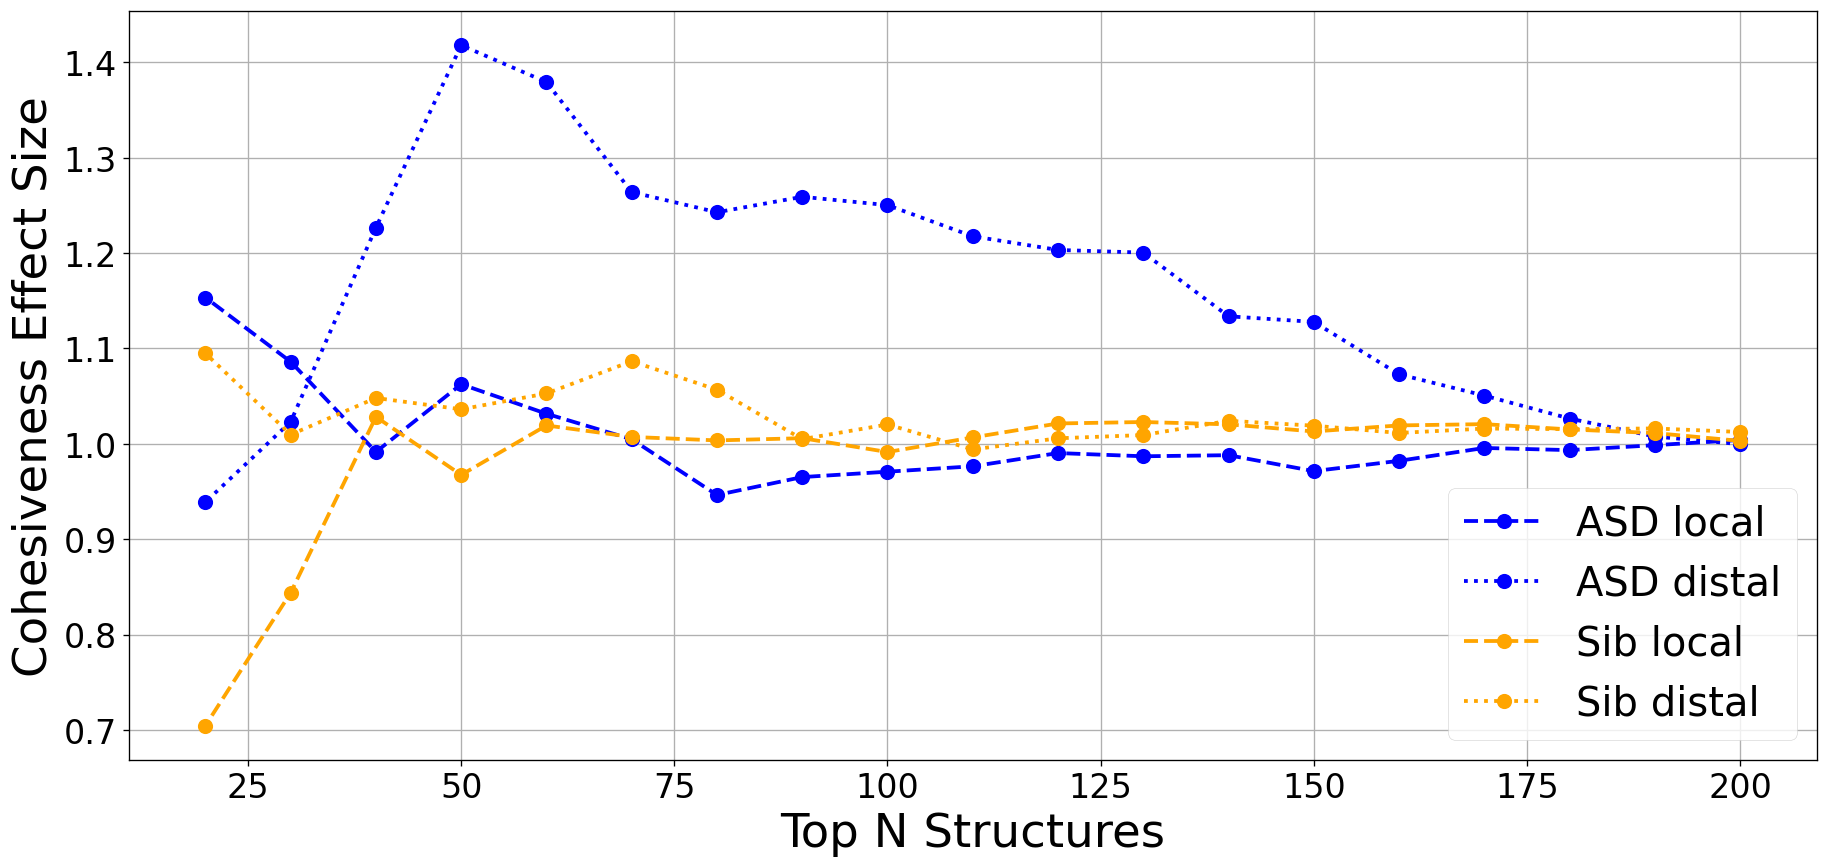

In [27]:
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(dpi=120, figsize=(16,8))
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 32})

#ax.plot(topNs, XX, label="ASD", marker="o", color="blue", ls="solid")
#ax.plot(topNs, YY, label="Sib",marker="o", color="orange", ls="solid")

ax.plot(topNs, XX1, label="ASD local", marker="o", color="blue", ls="dashed")
ax.plot(topNs, XX2, label="ASD distal",marker="o", color="blue", ls="dotted")
ax.plot(topNs, YY1, label="Sib local",marker="o", color="orange", ls="dashed")
ax.plot(topNs, YY2, label="Sib distal",marker="o", color="orange", ls="dotted")

ax.legend(fontsize=24, loc="lower right")
ax.set_ylabel("Cohesiveness Effect Size",fontsize=28)
ax.set_xlabel("Top N Structures",fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
plt.tight_layout()
#plt.title("Edge_perm_profile_Region_local_distal")
plt.show()
#plt.savefig("figs/Edge_perm_profile_Region_local_distal.pdf")

In [12]:
def correctP_EdgePerm(RealProfile, PermProfiles, topNs=topNs):
    Perm_Peaks = []
    Perm_Zs, Perm_Ps = [], []
    for profile in PermProfiles:
        ratio = profile/PermProfiles.mean(axis=0)
        peak_idx = np.argmax(ratio)
        Perm_Peaks.append(topNs[peak_idx])
        z, p = GetPermutationP(PermProfiles[:, peak_idx], profile[peak_idx])
        Perm_Zs.append(z)
        Perm_Ps.append(p)
    ratio = RealProfile/PermProfiles.mean(axis=0)
    real_peak = np.argmax(ratio)
    print("Real Peak at", topNs[real_peak])
    real_z, real_p = GetPermutationP(PermProfiles[:, real_peak], RealProfile[real_peak])
    return Perm_Ps, real_p

Real Peak at 50


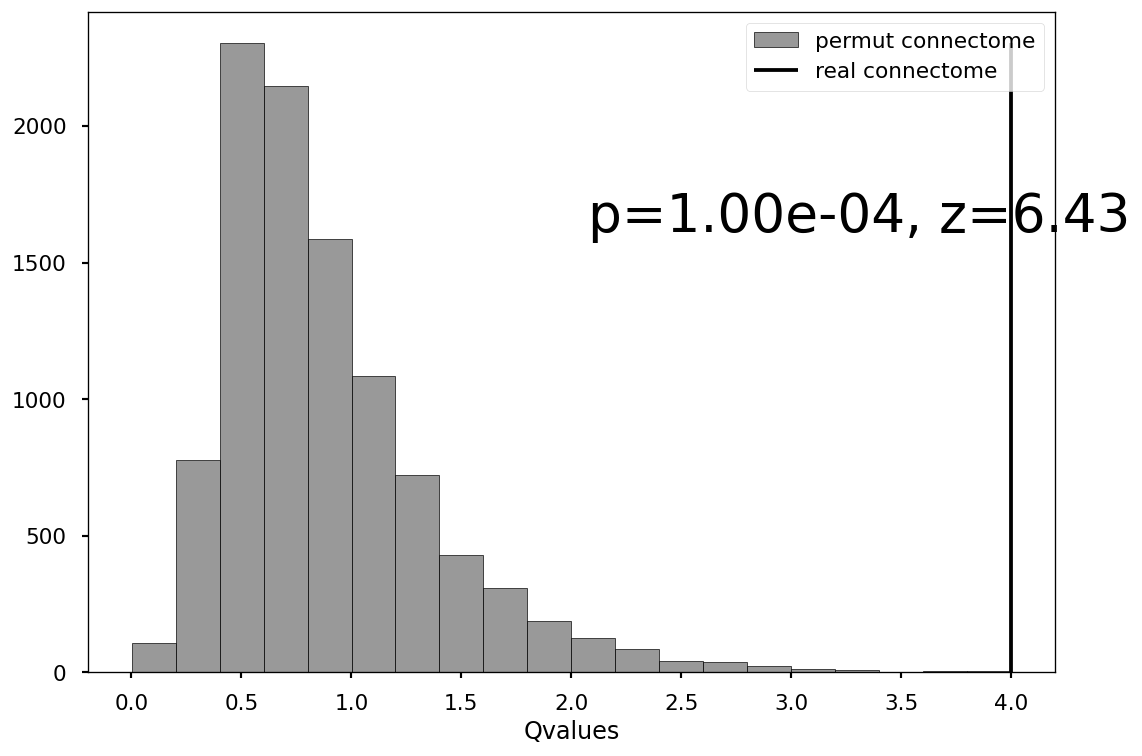

In [24]:
Perm_Ps, real_p = correctP_EdgePerm(ASD_Region, ASD_Region_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Qvalues, Q, ax, title="", 
                 xlabel="Qvalues", dist_label="permut connectome", 
                                   bar_label="real connectome")
plt.show()

Real Peak at 20


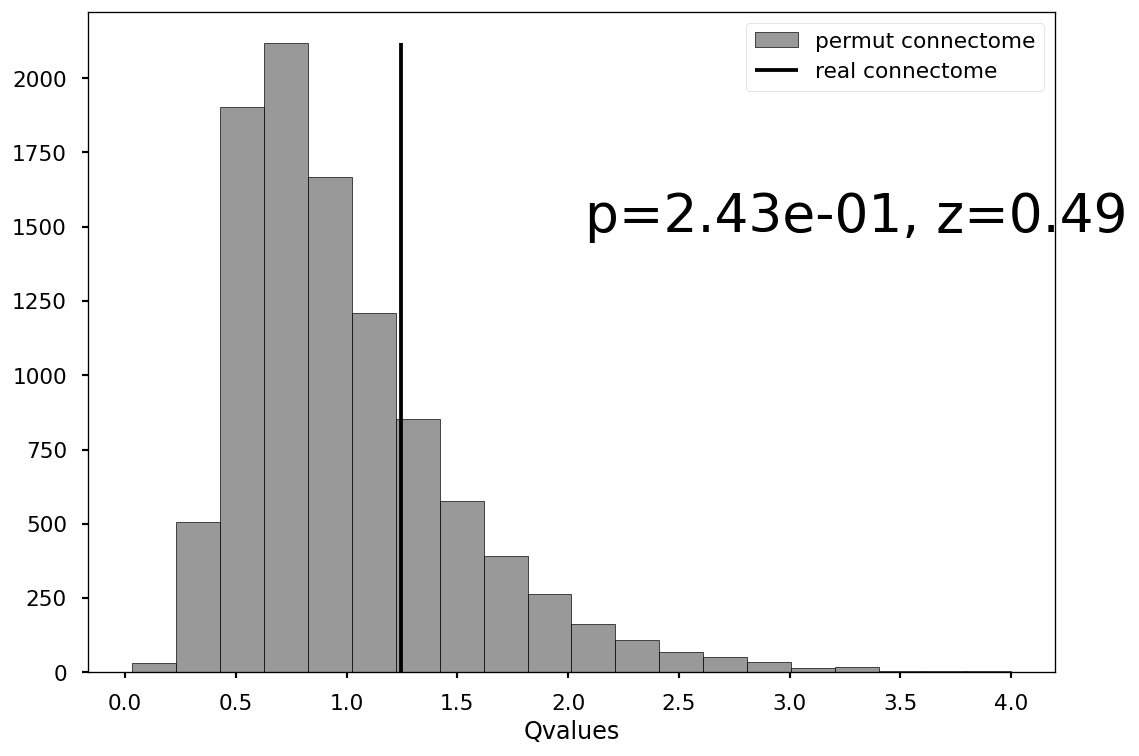

In [25]:
Perm_Ps, real_p = correctP_EdgePerm(ASD_Region_Local, ASD_Region_Local_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Qvalues, Q, ax, title="", 
                 xlabel="Qvalues", dist_label="permut connectome", 
                                   bar_label="real connectome")
plt.show()

Real Peak at 50


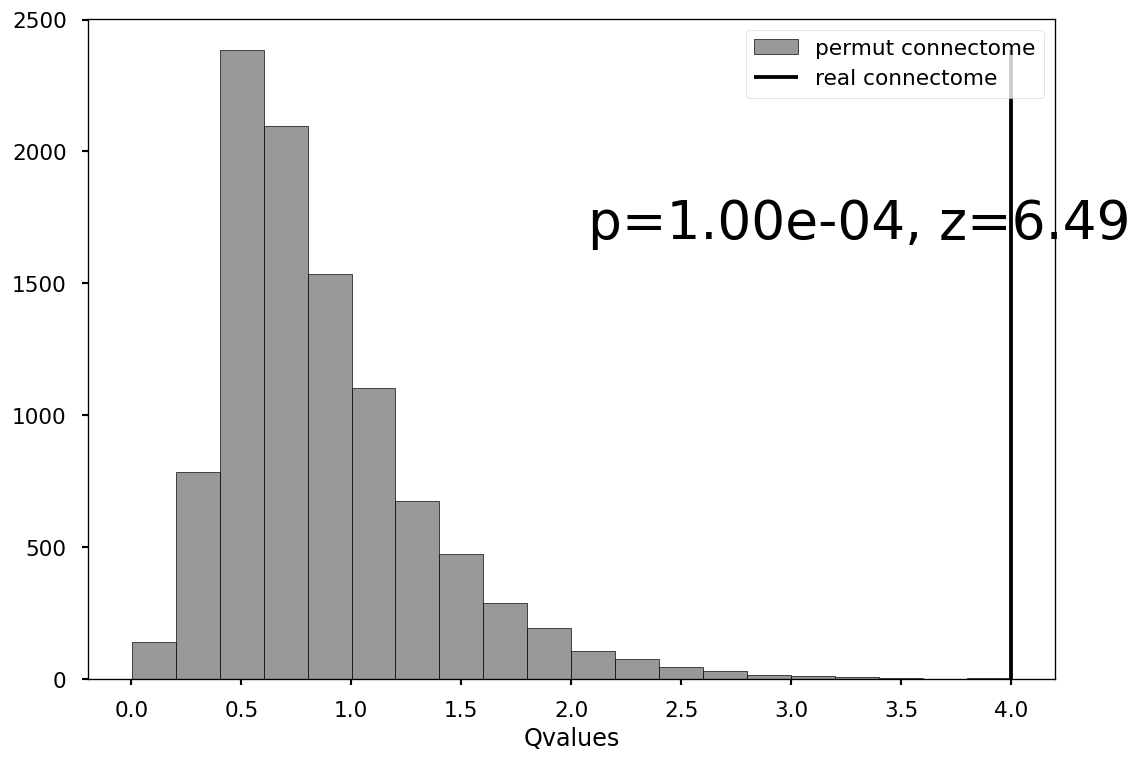

In [26]:
Perm_Ps, real_p = correctP_EdgePerm(ASD_Region_Distal, ASD_Region_Distal_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Qvalues, Q, ax, title="", 
                 xlabel="Qvalues", dist_label="permut connectome", 
                                   bar_label="real connectome")
plt.show()

Real Peak at 60


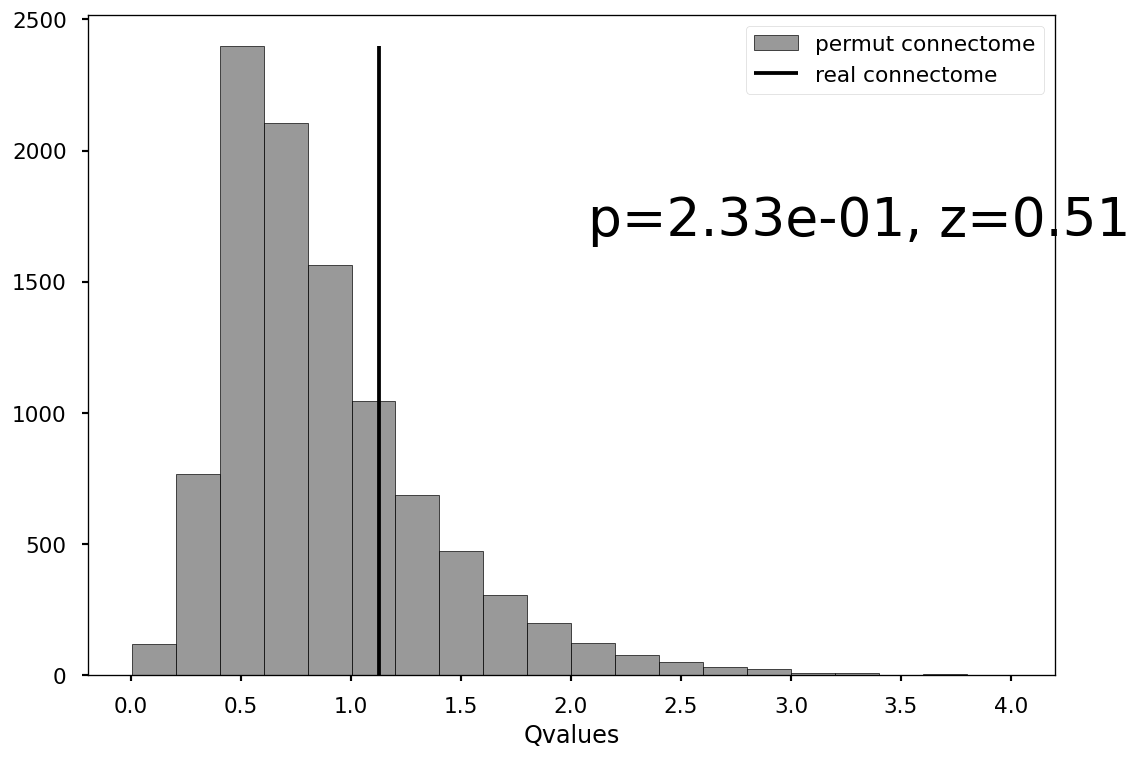

In [28]:
Perm_Ps, real_p = correctP_EdgePerm(Sib_Region, Sib_Region_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Qvalues, Q, ax, title="", 
                 xlabel="Qvalues", dist_label="permut connectome", 
                                   bar_label="real connectome")
plt.show()

Real Peak at 40


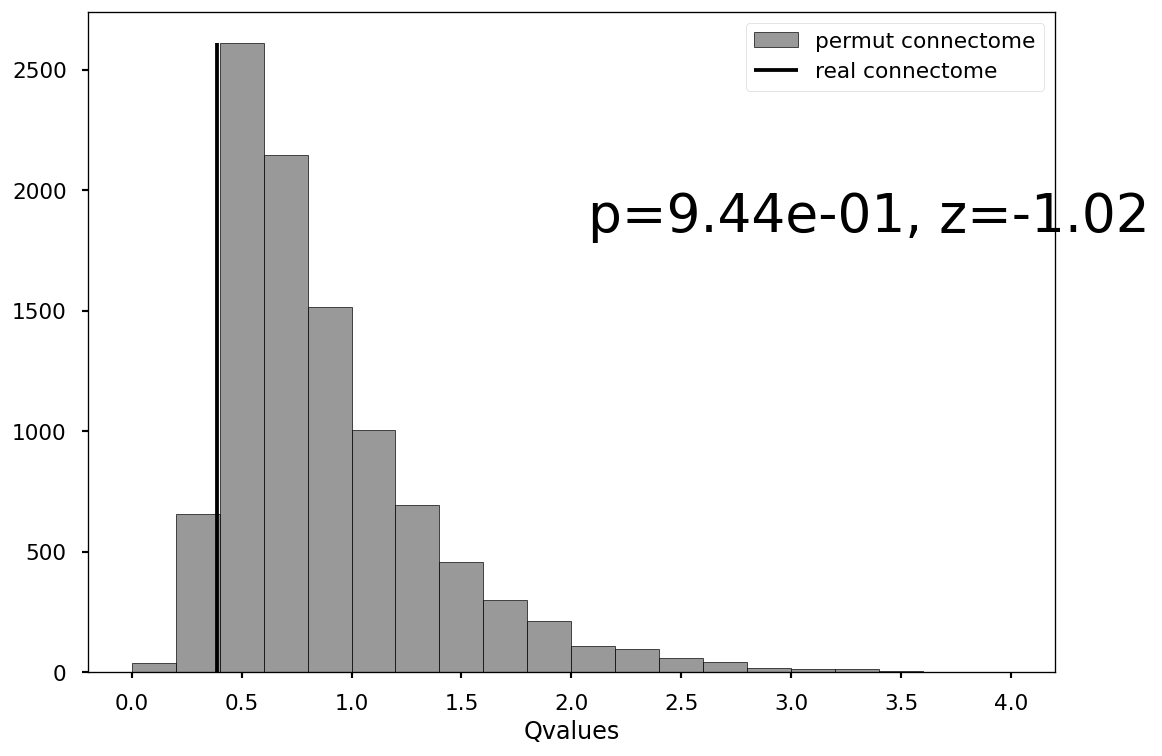

In [29]:
Perm_Ps, real_p = correctP_EdgePerm(Sib_Region_Local, Sib_Region_Local_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Qvalues, Q, ax, title="", 
                 xlabel="Qvalues", dist_label="permut connectome", 
                                   bar_label="real connectome")
plt.show()

Real Peak at 20


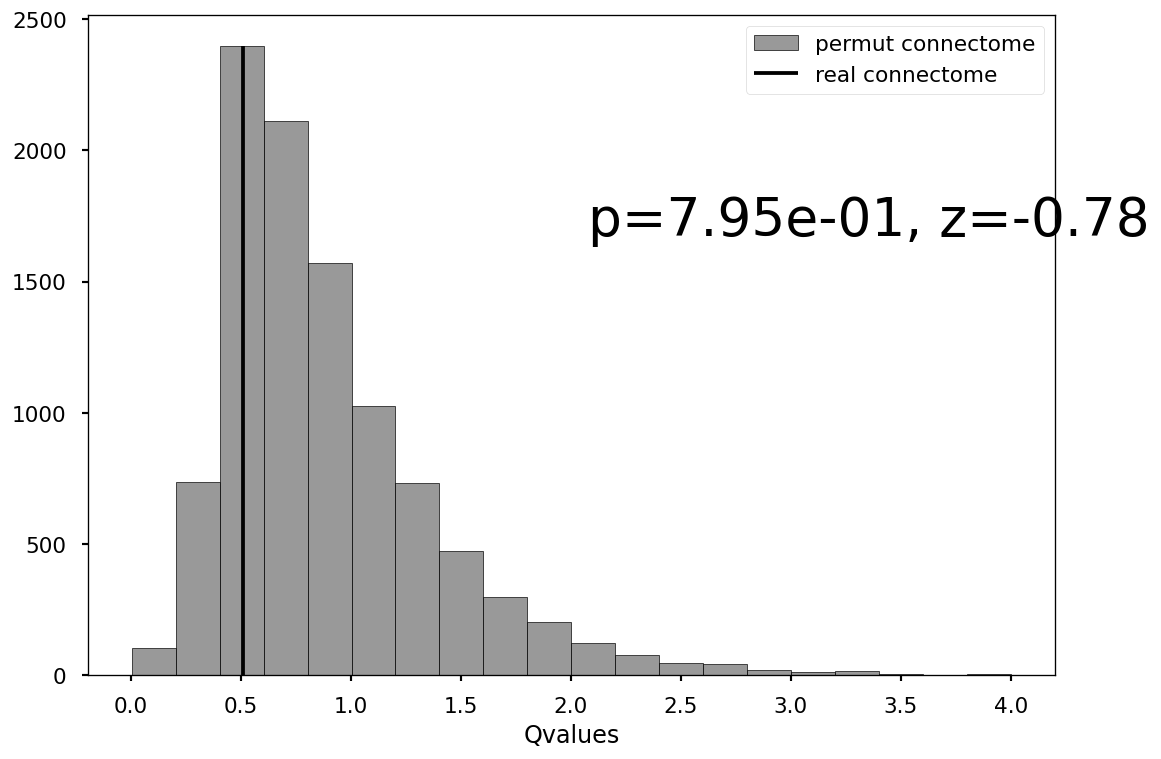

In [30]:
Perm_Ps, real_p = correctP_EdgePerm(Sib_Region_Distal, Sib_Region_Distal_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Qvalues, Q, ax, title="", 
                 xlabel="Qvalues", dist_label="permut connectome", 
                                   bar_label="real connectome")
plt.show()

## Distance Preserve

In [132]:
# Load Permut Dat
ASD_Distance_Permut = []
ASD_Distance_Local_Permut = []
ASD_Distance_Distal_Permut = []
Sib_Distance_Permut = []
Sib_Distance_Local_Permut = []
Sib_Distance_Distal_Permut = []

In [133]:
Distance_DIR = "dat/TopN_Cohe_EdgePermutation/DistancePreserve/"
for file in os.listdir(Distance_DIR):
    if file.startswith("ASD_Distance_Permut"):
        array = np.load(Distance_DIR+file)
        ASD_Distance_Permut.append(array)
    elif file.startswith("ASD_Distance_Local_Permut"):
        array = np.load(Distance_DIR+file)
        ASD_Distance_Local_Permut.append(array)
    elif file.startswith("ASD_Distance_Distal_Permut"):
        array = np.load(Distance_DIR+file)
        ASD_Distance_Distal_Permut.append(array)
    elif file.startswith("Sib_Distance_Permut"):
        array = np.load(Distance_DIR+file)
        Sib_Distance_Permut.append(array)
    elif file.startswith("Sib_Distance_Local_Permut"):
        array = np.load(Distance_DIR+file)
        Sib_Distance_Local_Permut.append(array)
    elif file.startswith("Sib_Distance_Distal_Permut"):
        array = np.load(Distance_DIR+file)
        Sib_Distance_Distal_Permut.append(array)

In [135]:
ASD_Distance_Permut = np.concatenate(ASD_Distance_Permut, axis=0)
ASD_Distance_Local_Permut = np.concatenate(ASD_Distance_Local_Permut, axis=0)
ASD_Distance_Distal_Permut = np.concatenate(ASD_Distance_Distal_Permut, axis=0)
Sib_Distance_Permut = np.concatenate(Sib_Distance_Permut, axis=0)
Sib_Distance_Local_Permut = np.concatenate(Sib_Distance_Local_Permut, axis=0)
Sib_Distance_Distal_Permut = np.concatenate(Sib_Distance_Distal_Permut, axis=0)

In [138]:
topNs = np.arange(200, 10, -10)
adj_mat = pd.read_csv(ConnFil, index_col=0)
graph = LoadConnectome2()
ASD_Bias = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")
Sib_Bias = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv", index_col="STR")
str2reg, reg2str = LoadSTR2REG()
dist_mat = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
adj_Distance_local, adj_Distance_distal = ConnectomeSeperation_Distance(adj_mat, dist_mat)
graph_Distance_local = LoadConnectome2(adj_Distance_local)
graph_Distance_distal = LoadConnectome2(adj_Distance_distal)

ASD_Distance, Sib_Distance = [], []
ASD_Distance_Local, ASD_Distance_Distal = [], []
Sib_Distance_Local, Sib_Distance_Distal = [], []
for topN in topNs:
    ASD_Cohe, _ = ScoreSTRSet(graph, ASD_Bias.index.values[:topN])
    Sib_Cohe, _ = ScoreSTRSet(graph, Sib_Bias.index.values[:topN])
    ASD_Cohe_l, _ = ScoreSTRSet(graph_Distance_local, ASD_Bias.index.values[:topN])
    ASD_Cohe_d, _ = ScoreSTRSet(graph_Distance_distal, ASD_Bias.index.values[:topN])
    Sib_Cohe_l, _ = ScoreSTRSet(graph_Distance_local, Sib_Bias.index.values[:topN])
    Sib_Cohe_d, _ = ScoreSTRSet(graph_Distance_distal, Sib_Bias.index.values[:topN])
    ASD_Distance.append(ASD_Cohe)
    Sib_Distance.append(Sib_Cohe)
    ASD_Distance_Local.append(ASD_Cohe_l)
    ASD_Distance_Distal.append(ASD_Cohe_d)
    Sib_Distance_Local.append(Sib_Cohe_l)
    Sib_Distance_Distal.append(Sib_Cohe_d)
ASD_Distance = np.array(ASD_Distance)
Sib_Distance = np.array(Sib_Distance)
ASD_Distance_Local = np.array(ASD_Distance_Local)
ASD_Distance_Distal = np.array(ASD_Distance_Distal)
Sib_Distance_Local = np.array(Sib_Distance_Local)
Sib_Distance_Distal = np.array(Sib_Distance_Distal)

In [163]:
XX = ASD_Distance/ASD_Distance_Permut.mean(axis=0)
YY = Sib_Distance/Sib_Distance_Permut.mean(axis=0)
XX1 = ASD_Distance_Local/ASD_Distance_Local_Permut.mean(axis=0)
XX2 = ASD_Distance_Distal/ASD_Distance_Distal_Permut.mean(axis=0)
YY1 = Sib_Distance_Local/Sib_Distance_Local_Permut.mean(axis=0)
YY2 = Sib_Distance_Distal/Sib_Distance_Distal_Permut.mean(axis=0)

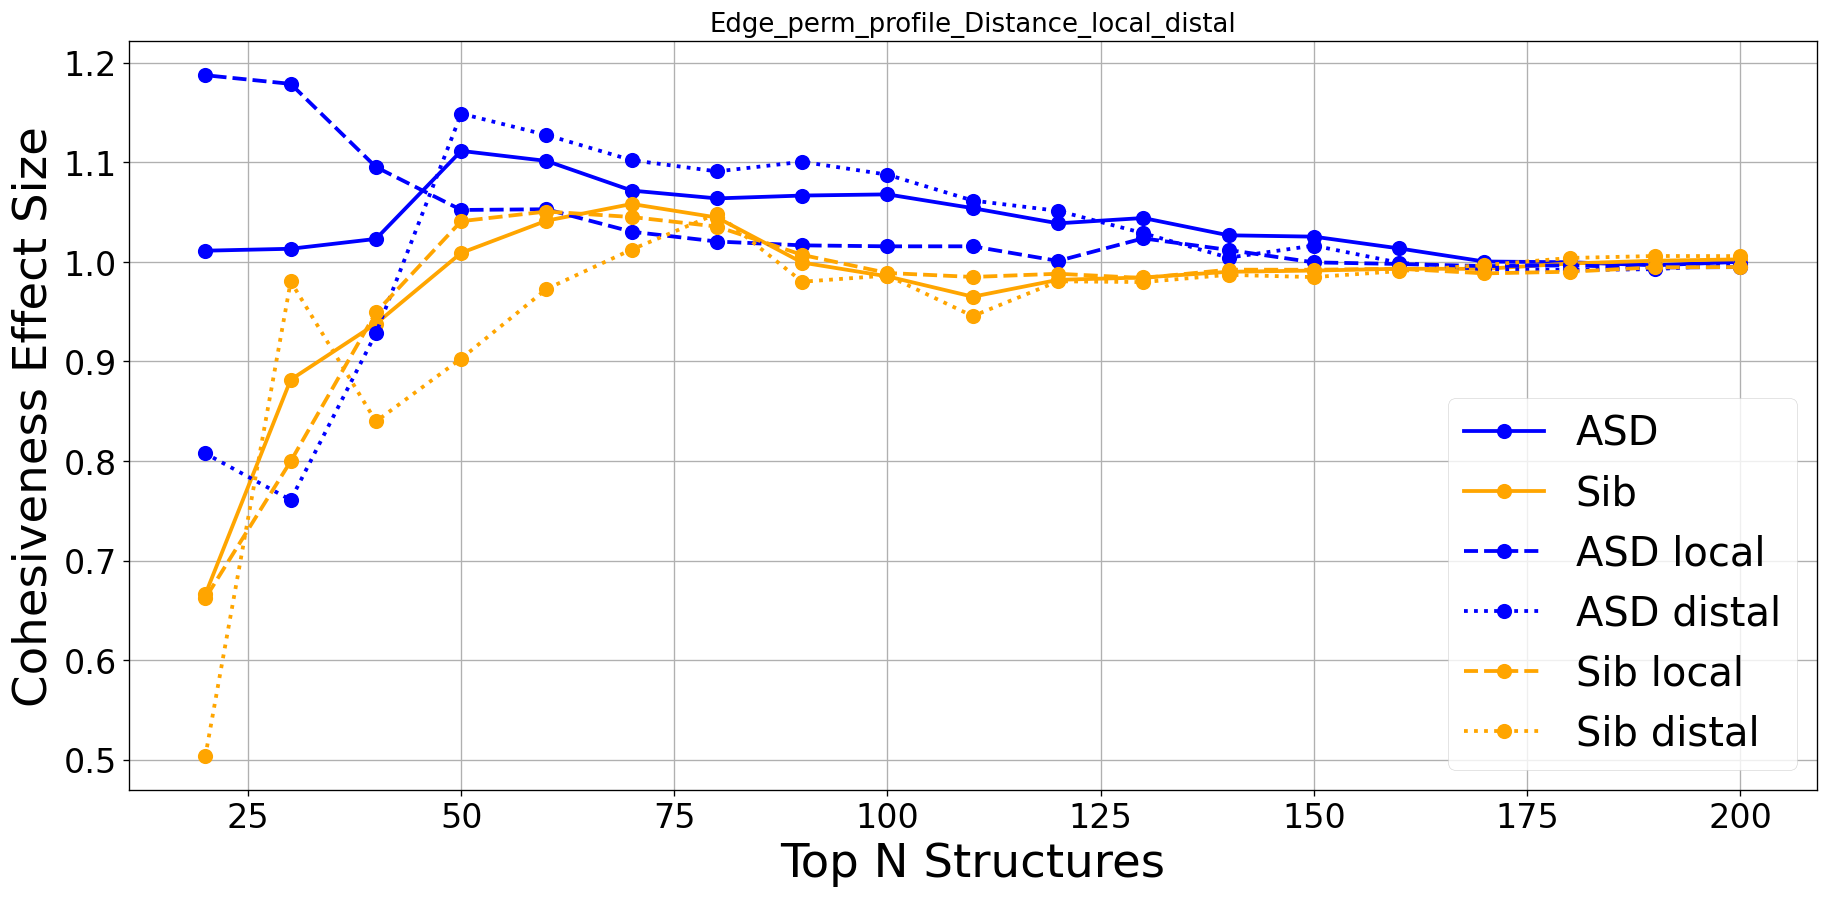

In [164]:
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(dpi=120, figsize=(16,8))
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 32})

ax.plot(topNs, XX, label="ASD", marker="o", color="blue", ls="solid")
ax.plot(topNs, YY, label="Sib",marker="o", color="orange", ls="solid")

ax.plot(topNs, XX1, label="ASD local", marker="o", color="blue", ls="dashed")
ax.plot(topNs, XX2, label="ASD distal",marker="o", color="blue", ls="dotted")
ax.plot(topNs, YY1, label="Sib local",marker="o", color="orange", ls="dashed")
ax.plot(topNs, YY2, label="Sib distal",marker="o", color="orange", ls="dotted")

ax.legend(fontsize=24, loc="lower right")
ax.set_ylabel("Cohesiveness Effect Size",fontsize=28)
ax.set_xlabel("Top N Structures",fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
plt.tight_layout()
plt.title("Edge_perm_profile_Distance_local_distal")
plt.show()
#plt.savefig("figs/Edge_perm_profile_Region_local_distal.pdf")

Real Peak at 50


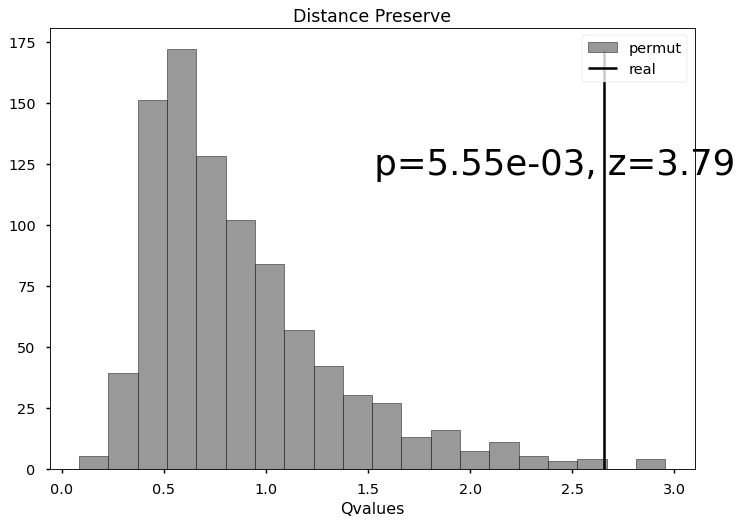

In [158]:
Perm_Ps, real_p = correctP_EdgePerm(ASD_Distance, ASD_Distance_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots()
PlotPermutationP(Qvalues, Q, ax, title="Distance Preserve", xlabel="Qvalues", dist_label="permut", bar_label="real")
plt.show()

Real Peak at 20


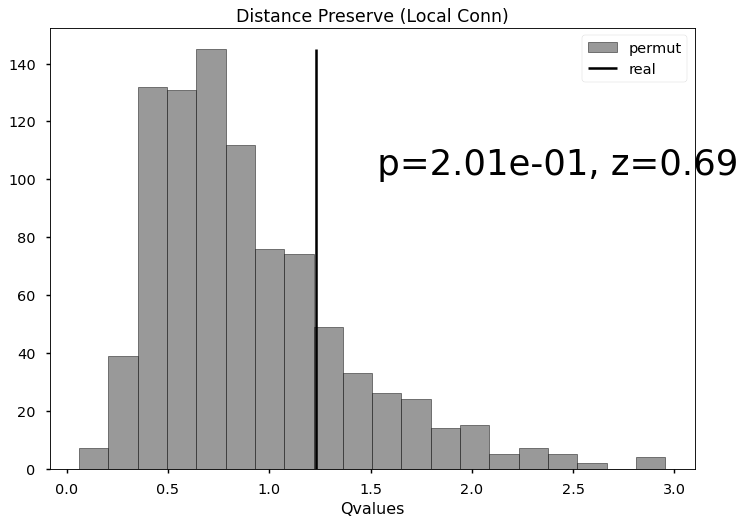

In [159]:
Perm_Ps, real_p = correctP_EdgePerm(ASD_Distance_Local, ASD_Distance_Local_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots()
PlotPermutationP(Qvalues, Q, ax, title="Distance Preserve (Local Conn)", xlabel="Qvalues", dist_label="permut", bar_label="real")
plt.show()

Real Peak at 50


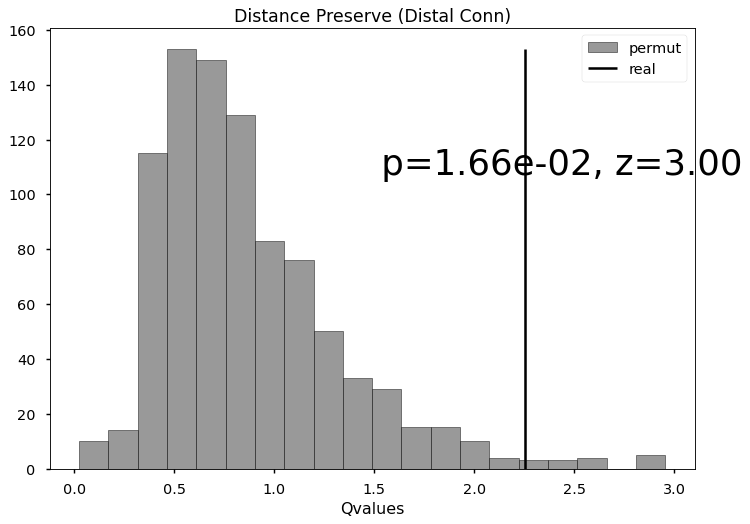

In [160]:
Perm_Ps, real_p = correctP_EdgePerm(ASD_Distance_Distal, ASD_Distance_Distal_Permut)
Qvalues = -np.log10(Perm_Ps)
Q = -np.log10(real_p)

fig, ax = plt.subplots()
PlotPermutationP(Qvalues, Q, ax, title="Distance Preserve (Distal Conn)", xlabel="Qvalues", dist_label="permut", bar_label="real")
plt.show()

In [24]:
graph = LoadConnectome2()
graph_local = LoadConnectome2("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv")
graph_distal = LoadConnectome2("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv")
EdgeWeightsDict = EdgeDict(graph)

In [25]:
ASD_STR_Ranks = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")

In [33]:
asd_cohe, _ = ScoreSTRSet2(graph, ASD_STR_Ranks.index.values[:50])
print(asd_cohe, _)
asd_cohe, _ = ScoreSTRSet2(graph_distal, ASD_STR_Ranks.index.values[:50])
print(asd_cohe, _)

0.3492723492723493 336
0.33275862068965517 193


In [34]:
match_dir = "dat/Control_GeneSet_Bias/Rand_Gene_WeightTransfer/"
df = pd.read_csv(match_dir + "cont.bias.4348.csv", index_col="STR")
top_strs = df.index.values[:50]
cont_cohe, _ = ScoreSTRSet2(graph, top_strs)
print(cont_cohe, _)
cont_cohe, _ = ScoreSTRSet2(graph_distal, top_strs)
print(cont_cohe, _)

0.47983665135273096 470
0.4208289054197662 198


In [35]:
df.head(50)

,EFFECT,REGION,Rank
STR,,,
Paraventricular_nucleus_of_the_thalamus,0.427270,Thalamus,1
Diagonal_band_nucleus,0.424407,Pallidum,2
Median_preoptic_nucleus,0.406532,Hypothalamus,3
Dorsal_nucleus_raphe,0.365247,Midbrain,4
Dorsal_premammillary_nucleus,0.343044,Hypothalamus,5
Periventricular_hypothalamic_nucleus_posterior_part,0.342721,Hypothalamus,6
Lateral_septal_nucleus_ventral_part,0.339991,Striatum,7
Posterior_hypothalamic_nucleus,0.331225,Hypothalamus,8
Medial_habenula,0.327976,Thalamus,9
